In [231]:
import pandas as pd
import numpy as np

In [232]:
df = pd.read_csv("datafixbanget.csv")
# df = df.drop(df.columns[[0,1]], axis=1)
# df['lokasi'] = df['lokasi'].str.replace("kel. ","")
df.drop(df.columns[0], axis=1, inplace=True)
# df.head()

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5607 entries, 0 to 5606
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tanggal_kejadian       5607 non-null   object 
 1   kota_administrasi      5607 non-null   object 
 2   lokasi                 5607 non-null   object 
 3   rw                     5553 non-null   object 
 4   jumlah_terdampak_jiwa  5607 non-null   int64  
 5   ketinggian_air         5607 non-null   int64  
 6   tahun                  5607 non-null   int64  
 7   kecamatan              5594 non-null   object 
 8   latitude               5594 non-null   float64
 9   longitude              5594 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 438.2+ KB


# Cleaning

In [234]:
# df['ketinggian_air'] = df['ketinggian_air'].str.replace("s.d.","-")
df['tanggal_kejadian'] = df['tanggal_kejadian'].str.replace("s.d.","-")
df['lokasi'] = df['lokasi'].str.replace("kel. ","")
# Menghapus baris dengan nilai "kepulauan seribu" di kolom "kota_administrasi"
df = df[df['kota_administrasi'] != 'kepulauan seribu']
df = df.dropna(subset=['ketinggian_air'])
df = df.dropna(subset=['tanggal_kejadian'])
df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17668\4145894863.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tanggal_kejadian'] = df['tanggal_kejadian'].str.replace("s.d.","-")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17668\4145894863.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['lokasi'] = df['lokasi'].str.replace("kel. ","")


,tanggal_kejadian,kota_administrasi,lokasi,rw,jumlah_terdampak_jiwa,ketinggian_air,tahun,kecamatan,latitude,longitude
0,2018-01-02,jakarta barat,kamal muara,1,0,30,2018,penjaringan,-6.185562,106.940109
1,2018-01-02,jakarta barat,kamal muara,4,0,30,2018,penjaringan,-6.185562,106.940109
2,2018-01-03,jakarta utara,kamal,1,0,25,2018,kalideres,-6.152899,106.744718
3,2018-01-03,jakarta utara,kamal,4,0,25,2018,kalideres,-6.152899,106.744718
4,2018-01-04,jakarta utara,kamal,1,0,25,2018,kalideres,-6.152899,106.744718
...,...,...,...,...,...,...,...,...,...,...
5597,2020-12-06,jakarta timur,cililitan,7,10,20,2020,kramat jati,-6.203624,106.864579
5598,2020-12-06,jakarta timur,cawang,3,0,60,2020,kramat jati,-6.203624,106.864579
5599,2020-12-06,jakarta timur,cawang,0,0,60,2020,kramat jati,-6.203624,106.864579
5600,2020-12-06,jakarta timur,cawang,5,0,15,2020,kramat jati,-6.203624,106.864579


In [235]:
df.shape

(5542, 10)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5542 entries, 0 to 5601
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tanggal_kejadian       5542 non-null   object 
 1   kota_administrasi      5542 non-null   object 
 2   lokasi                 5542 non-null   object 
 3   rw                     5488 non-null   object 
 4   jumlah_terdampak_jiwa  5542 non-null   int64  
 5   ketinggian_air         5542 non-null   int64  
 6   tahun                  5542 non-null   int64  
 7   kecamatan              5529 non-null   object 
 8   latitude               5529 non-null   float64
 9   longitude              5529 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 476.3+ KB


In [237]:
import dateparser

# Mengubah tipe data kolom 'tanggal' menjadi datetime
df['tanggal_kejadian'] = df['tanggal_kejadian'].apply(lambda x: dateparser.parse(x))

In [189]:
df.head()

,tanggal_kejadian,kota_administrasi,lokasi,rw,jumlah_terdampak_jiwa,ketinggian_air,tahun,kecamatan,latitude,longitude
0,2018-01-02,jakarta barat,kamal muara,1,0,30,2018,penjaringan,-6.185562,106.940109
1,2018-01-02,jakarta barat,kamal muara,4,0,30,2018,penjaringan,-6.185562,106.940109
2,2018-01-03,jakarta utara,kamal,1,0,25,2018,kalideres,-6.152899,106.744718
3,2018-01-03,jakarta utara,kamal,4,0,25,2018,kalideres,-6.152899,106.744718
4,2018-01-04,jakarta utara,kamal,1,0,25,2018,kalideres,-6.152899,106.744718


In [190]:
df.isna().sum().sort_values(ascending=False)

rw                       54
kecamatan                13
latitude                 13
longitude                13
tanggal_kejadian          0
kota_administrasi         0
lokasi                    0
jumlah_terdampak_jiwa     0
ketinggian_air            0
tahun                     0
dtype: int64

In [191]:
df = df.dropna(subset=['kecamatan'])
df.isna().sum().sort_values(ascending=False)

rw                       54
tanggal_kejadian          0
kota_administrasi         0
lokasi                    0
jumlah_terdampak_jiwa     0
ketinggian_air            0
tahun                     0
kecamatan                 0
latitude                  0
longitude                 0
dtype: int64

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Jumlah Banjir

In [193]:
# n_colors = len(grouped_data)
# palette = ['lightgray'] * (n_colors - 1) + ['steelblue']  # Warna 'steelblue' digunakan untuk nilai paling tinggi

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17668\1926738040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tahun'] = df['tanggal_kejadian'].dt.year


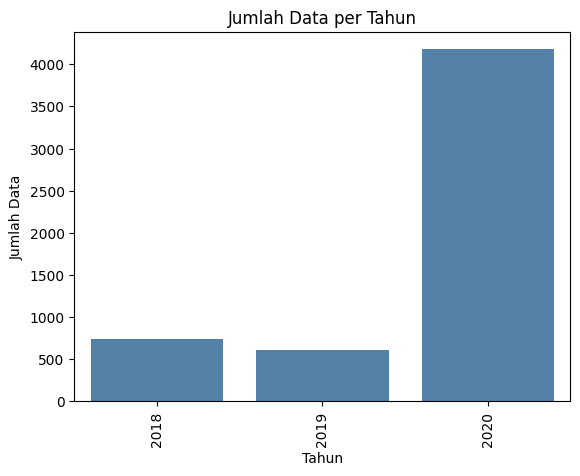

In [194]:
# Membuat kolom baru 'year' berdasarkan tahun pada kolom 'tanggal_kejadian'
df['tahun'] = df['tanggal_kejadian'].dt.year

# Melakukan grouping berdasarkan kolom 'year' dan menghitung jumlah data dalam setiap grup tahun
grouped_data = df.groupby('tahun').size().reset_index(name='count')

# Membuat plot menggunakan Seaborn
sns.barplot(x='tahun', y='count', data=grouped_data, palette=['steelblue'])
plt.xlabel('Tahun')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Tahun')
plt.xticks(rotation=90)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()

Jumlah banjir menaik tinggi di tahun 2020

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17668\239622456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tahun'] = df['tanggal_kejadian'].dt.year


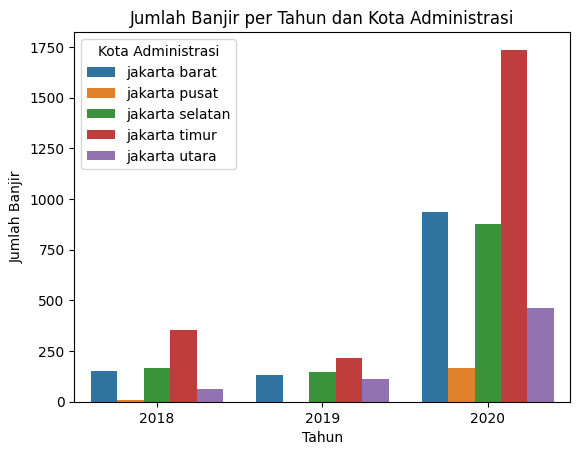

In [195]:
# Mengambil tahun dari kolom 'tanggal_kejadian' dan menambahkannya sebagai kolom baru 'tahun'
df['tahun'] = df['tanggal_kejadian'].dt.year

# Melakukan grouping berdasarkan tahun di kolom 'tanggal_kejadian' dan menghitung jumlah terdampak jiwa berdasarkan grup 'kota_administrasi'
grouped_data = df.groupby(['tahun', 'kota_administrasi'])['jumlah_terdampak_jiwa'].count().reset_index()

# Membuat plot menggunakan Seaborn
sns.barplot(x='tahun', y='jumlah_terdampak_jiwa', hue='kota_administrasi', data=grouped_data)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Banjir')
plt.title('Jumlah Banjir per Tahun dan Kota Administrasi')
plt.legend(title='Kota Administrasi', loc='upper left')
plt.show()

Di setiap tahunnya jakarta timur memiliki jumlah banjir tertinggi

# Ketinggian Air rata - rata

In [196]:
df['tahun'] = df['tanggal_kejadian'].dt.year

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17668\504232004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tahun'] = df['tanggal_kejadian'].dt.year


In [197]:
grouped_data = df.groupby('tahun')['ketinggian_air'].mean().reset_index()
# grouped_data

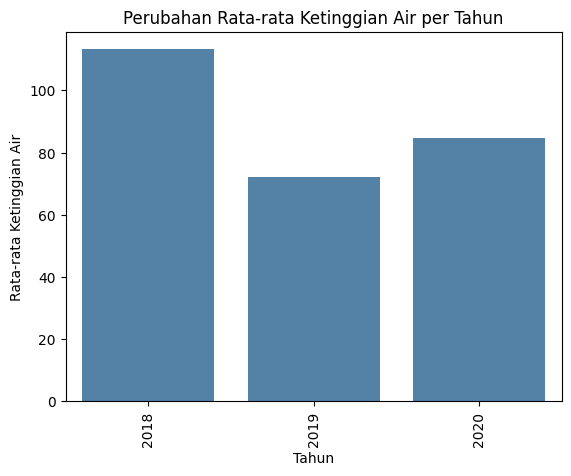

In [198]:
# Membuat diagram batang menggunakan Seaborn
sns.barplot(x='tahun', y='ketinggian_air', data=grouped_data, palette=['steelblue'])
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Ketinggian Air')
plt.title('Perubahan Rata-rata Ketinggian Air per Tahun')
plt.xticks(rotation=90)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()

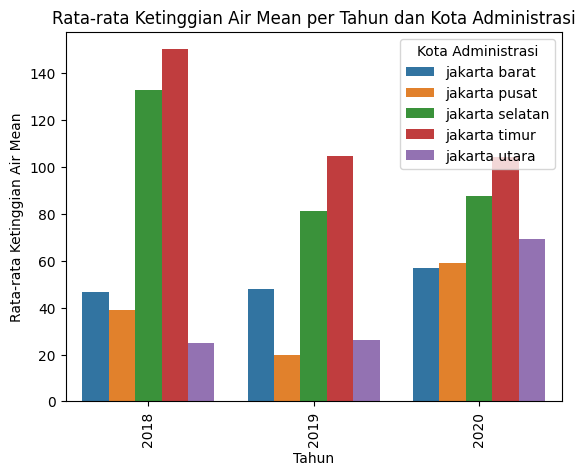

In [199]:
# Melakukan grouping berdasarkan kolom 'year' dan 'kota_administrasi', serta menghitung rata-rata ketinggian_air
grouped_data = df.groupby(['tahun', 'kota_administrasi'])['ketinggian_air'].mean().reset_index()

# Membuat plot menggunakan Seaborn
sns.barplot(x='tahun', y='ketinggian_air', hue='kota_administrasi', data=grouped_data)
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Ketinggian Air Mean')
plt.title('Rata-rata Ketinggian Air Mean per Tahun dan Kota Administrasi')
plt.legend(title='Kota Administrasi', loc='upper right')
plt.xticks(rotation=90)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()

Selain memiliki jumlah banjir tertinggi setiap tahunnya, di ketinggian air pun jakarta timur memiliki ketinggian air tertinggi setiap tahunnya. Maka, dari sini perlu diselidiki mengapa jakarta timur dapat memiliki jumlah dan ketinggian banjir tertinggi

In [200]:
# Menghapus spasi di awal kata jika terdapat nilai " kel. " dalam kolom
df['kecamatan'] = df['kecamatan'].str.replace(' jatinegara. ', 'jatinegara')
df['kecamatan'] = df['kecamatan'].str.replace(' kramat jati. ', 'kramat jati')
df['kecamatan'] = df['kecamatan'].str.strip()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17668\2351312941.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['kecamatan'] = df['kecamatan'].str.replace(' jatinegara. ', 'jatinegara')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17668\2351312941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kecamatan'] = df['kecamatan'].str.replace(' jatinegara. ', 'jatinegara')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17668\2351312941.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['kecamatan'] = df['kecamatan'].str.replace(' kramat jati. ', 'kramat jati')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17668\23

Didapatkan bahwa jatinegara merupakan kecamatan paling banyak terjadi banjir di jakarta timur

In [201]:
df.head()

,tanggal_kejadian,kota_administrasi,lokasi,rw,jumlah_terdampak_jiwa,ketinggian_air,tahun,kecamatan,latitude,longitude
0,2018-01-02,jakarta barat,kamal muara,1,0,30,2018,penjaringan,-6.185562,106.940109
1,2018-01-02,jakarta barat,kamal muara,4,0,30,2018,penjaringan,-6.185562,106.940109
2,2018-01-03,jakarta utara,kamal,1,0,25,2018,kalideres,-6.152899,106.744718
3,2018-01-03,jakarta utara,kamal,4,0,25,2018,kalideres,-6.152899,106.744718
4,2018-01-04,jakarta utara,kamal,1,0,25,2018,kalideres,-6.152899,106.744718


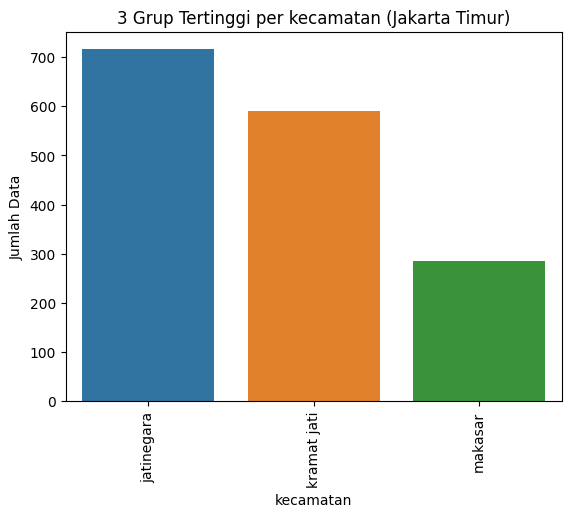

In [202]:
# Melakukan grouping berdasarkan kolom 'year' dan 'lokasi', serta menghitung jumlah data dalam setiap grup
grouped_data = df[df['kota_administrasi'] == 'jakarta timur'].groupby(['tahun', 'kecamatan']).size().reset_index(name='count')

# Menggabungkan data per tahun menjadi satu grup
merged_data = grouped_data.groupby('kecamatan')['count'].sum().reset_index()

# Mengambil 3 grup tertinggi berdasarkan jumlah data
top_3_data = merged_data.nlargest(3, 'count')

# Membuat plot menggunakan Seaborn
sns.barplot(x='kecamatan', y='count', data=top_3_data)
plt.xlabel('kecamatan')
plt.ylabel('Jumlah Data')
plt.title('3 Grup Tertinggi per kecamatan (Jakarta Timur)')
plt.xticks(rotation=90)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()

Jika dijumlahkan tiga tahun terakhir, kecamatan jatinegara, kramat jati, dan makasar merupakan kecamatan paling banyak terjadi  dengan kecamatan jatinegara paling tinggi

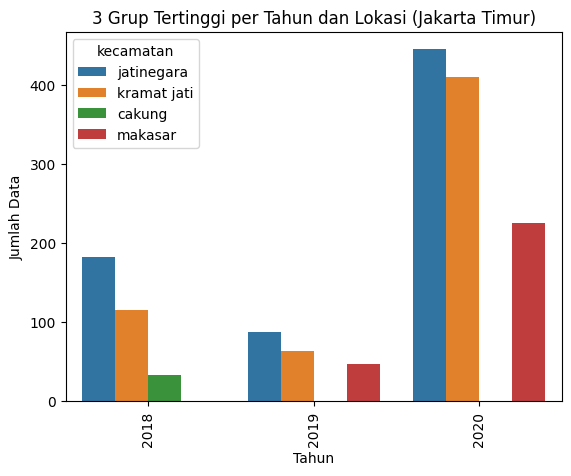

In [203]:
# Melakukan grouping berdasarkan kolom 'year' dan 'kecamatan', serta menghitung jumlah data dalam setiap grup
grouped_data = df[df['kota_administrasi'] == 'jakarta timur'].groupby(['tahun', 'kecamatan']).size().reset_index(name='count')

# Mengurutkan grup berdasarkan jumlah data dalam setiap tahun
sorted_data = grouped_data.groupby('tahun').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Membuat plot menggunakan Seaborn
sns.barplot(x='tahun', y='count', hue='kecamatan', data=sorted_data)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Data')
plt.title('3 Grup Tertinggi per Tahun dan Lokasi (Jakarta Timur)')
plt.legend(title='kecamatan', loc='upper left')
plt.xticks(rotation=90)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()

Di setiap tahunnya pun kecamatan jatinegara menjadi kecamatan paling banyak terjadi banjir

In [204]:
# Melakukan grouping berdasarkan 'kecamatan' dan menghitung jumlah terdampak jiwa
grouped_data = df.groupby('kecamatan')['jumlah_terdampak_jiwa'].count()

# Menampilkan hasil grouping dan count dalam bentuk pandas DataFrame, diurutkan dari yang terbesar ke terkecil
df_grouped = pd.DataFrame(grouped_data)
df_grouped.columns = ['jumlah_kejadian']
df_grouped.reset_index(inplace=True)
df_grouped_sorted = df_grouped.sort_values(by='jumlah_kejadian', ascending=False)

print(df_grouped_sorted)

            kecamatan  jumlah_kejadian
11         jatinegara              716
21        kramat jati              590
2          cengkareng              543
30       pasar minggu              333
22            makasar              285
13          kalideres              264
32        penjaringan              228
0              cakung              195
4           cilincing              184
16        kebon jeruk              161
6             ciracas              159
43              tebet              158
29           pancoran              151
19          kembangan              137
15     kebayoran lama              125
7         duren sawit              124
24   mampang prapatan               97
17      kelapa gading               91
14     kebayoran baru               83
33       pesanggrahan               81
5            cipayung               79
35         pulogadung               76
3            cilandak               71
28           palmerah               70
10          jagakarsa    

# Analisa Wilayah

In [205]:
import geopandas as gpd

In [206]:
data_wilayah = gpd.read_file('city-regency/id-jk-jaktim.geojson')  # Ganti 'file.geojson' dengan nama file GeoJSON yang sesuai


In [207]:
data_wilayah['name'] = data_wilayah['name'].str.lower()
data_wilayah

,name,geometry
0,matraman,"MULTIPOLYGON (((106.84915 -6.20755, 106.84940 ..."
1,pulo gadung,"MULTIPOLYGON (((106.87325 -6.20231, 106.87325 ..."
2,jatinegara,"MULTIPOLYGON (((106.85630 -6.21630, 106.85645 ..."
3,duren sawit,"MULTIPOLYGON (((106.89004 -6.23041, 106.89005 ..."
4,kramat jati,"MULTIPOLYGON (((106.84688 -6.27879, 106.84677 ..."
5,makasar,"MULTIPOLYGON (((106.87133 -6.25539, 106.87222 ..."
6,pasar rebo,"MULTIPOLYGON (((106.83972 -6.33514, 106.83975 ..."
7,ciracas,"MULTIPOLYGON (((106.86259 -6.31139, 106.86277 ..."
8,cipayung,"MULTIPOLYGON (((106.88237 -6.29880, 106.88288 ..."
9,cakung,"MULTIPOLYGON (((106.90071 -6.21364, 106.90081 ..."


In [208]:
wilayah = data_wilayah['name'].to_numpy()
wilayah

array(['matraman', 'pulo gadung', 'jatinegara', 'duren sawit',
       'kramat jati', 'makasar', 'pasar rebo', 'ciracas', 'cipayung',
       'cakung'], dtype=object)

In [209]:
kecamatan_asli = df_grouped_sorted
kecamatan_asli = kecamatan_asli[kecamatan_asli['kecamatan'].isin(wilayah)]
kecamatan_asli

,kecamatan,jumlah_kejadian
11,jatinegara,716
21,kramat jati,590
22,makasar,285
0,cakung,195
6,ciracas,159
7,duren sawit,124
5,cipayung,79
25,matraman,45
31,pasar rebo,37
34,pulo gadung,1


In [210]:
data_wilayah['jumlah_banjir'] = [45,1,716,124,590,285,37,159,79,195]
data_wilayah

,name,geometry,jumlah_banjir
0,matraman,"MULTIPOLYGON (((106.84915 -6.20755, 106.84940 ...",45
1,pulo gadung,"MULTIPOLYGON (((106.87325 -6.20231, 106.87325 ...",1
2,jatinegara,"MULTIPOLYGON (((106.85630 -6.21630, 106.85645 ...",716
3,duren sawit,"MULTIPOLYGON (((106.89004 -6.23041, 106.89005 ...",124
4,kramat jati,"MULTIPOLYGON (((106.84688 -6.27879, 106.84677 ...",590
5,makasar,"MULTIPOLYGON (((106.87133 -6.25539, 106.87222 ...",285
6,pasar rebo,"MULTIPOLYGON (((106.83972 -6.33514, 106.83975 ...",37
7,ciracas,"MULTIPOLYGON (((106.86259 -6.31139, 106.86277 ...",159
8,cipayung,"MULTIPOLYGON (((106.88237 -6.29880, 106.88288 ...",79
9,cakung,"MULTIPOLYGON (((106.90071 -6.21364, 106.90081 ...",195


In [218]:
import branca.colormap as cm

# Membuat objek peta Folium
m = folium.Map(location=[-6.19286, 106.83568], zoom_start=10, tiles="cartodb positron")

# Menentukan skala warna menggunakan ColorMap
colormap = cm.linear.YlOrRd_09.scale(data_wilayah['jumlah_banjir'].min(), data_wilayah['jumlah_banjir'].max())

# Menambahkan layer GeoJSON ke peta dengan skema warna gradasi sesuai 'jumlah_banjir'
folium.GeoJson(
    data_wilayah,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['jumlah_banjir']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.5
    }
).add_to(m)

# Menambahkan tooltip dengan nama wilayah dan jumlah banjir
tooltip = folium.features.GeoJsonTooltip(fields=['name', 'jumlah_banjir'], labels=True)
folium.GeoJson(data_wilayah, tooltip=tooltip).add_to(m)

# Menambahkan legend untuk skala warna
colormap.caption = 'Jumlah Banjir'
m.add_child(colormap)

m

In [230]:
import branca.colormap as cm

# Membuat objek peta Folium
m = folium.Map(location=[-6.19286, 106.83568], zoom_start=10, tiles="cartodb positron")

# Menentukan skala warna menggunakan ColorMap
colormap = cm.linear.YlOrRd_09.scale(data_wilayah['jumlah_banjir'].min(), data_wilayah['jumlah_banjir'].max())

# Menambahkan layer GeoJSON ke peta dengan skema warna gradasi sesuai 'jumlah_banjir'
folium.GeoJson(
    data_wilayah,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['jumlah_banjir']),
        'color': None,  # Menghilangkan border (garis tepi)
        'weight': 0,  # Menghilangkan border (garis tepi)
        'fillOpacity': 0.5
    }
).add_to(m)

# Menambahkan tooltip dengan nama wilayah dan jumlah banjir
tooltip = folium.features.GeoJsonTooltip(fields=['name', 'jumlah_banjir'], labels=True)
folium.GeoJson(data_wilayah, tooltip=tooltip).add_to(m)

# Menambahkan legend untuk skala warna
colormap.caption = 'Jumlah Banjir'
m.add_child(colormap)

m

In [ ]:
Karena

In [ ]:
print(data_wilayah.head())  # Menampilkan beberapa baris pertama data_wilayah
print(data_wilayah.info())  # Menampilkan informasi tentang struktur data_wilayah


          name                                           geometry
0     matraman  MULTIPOLYGON (((106.84915 -6.20755, 106.84940 ...
1  pulo gadung  MULTIPOLYGON (((106.87325 -6.20231, 106.87325 ...
2   jatinegara  MULTIPOLYGON (((106.85630 -6.21630, 106.85645 ...
3  duren sawit  MULTIPOLYGON (((106.89004 -6.23041, 106.89005 ...
4  kramat jati  MULTIPOLYGON (((106.84688 -6.27879, 106.84677 ...
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      10 non-null     object  
 1   geometry  10 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 288.0+ bytes
None
